In [1]:
import datetime
import jsonlines
import os
import pandas as pd
import numpy as np
%matplotlib inline

## Build dataset

In [2]:
# Load user tweets
files = ['data/' + f for f in os.listdir("data")]
L = []
for path in files:
    try:
        with jsonlines.open(path, mode='r') as reader:
            tmp = [line for line in reader.iter()]
            if len(tmp) > 50 & isinstance(tmp, list):
                L.extend(tmp)
            else:
                print("%s had less than 50 tweets. skipping.." %path)
    except:
        print("Did not manage to process: %s" % path) 

Did not manage to process: data/.DS_Store
data/AbuHus.jsonl had less than 50 tweets. skipping..
data/afarbrot.jsonl had less than 50 tweets. skipping..
data/AkselSterri.jsonl had less than 50 tweets. skipping..
data/andersnilsen.jsonl had less than 50 tweets. skipping..
data/anineki.jsonl had less than 50 tweets. skipping..
data/Arbeidsdep.jsonl had less than 50 tweets. skipping..
data/Are.jsonl had less than 50 tweets. skipping..
data/ArneKristian.jsonl had less than 50 tweets. skipping..
data/arnestrand.jsonl had less than 50 tweets. skipping..
data/aspevoll.jsonl had less than 50 tweets. skipping..
data/astridmeland.jsonl had less than 50 tweets. skipping..
data/AuroraMohnStued.jsonl had less than 50 tweets. skipping..
data/Basilmaarud.jsonl had less than 50 tweets. skipping..
data/BentHHoyre.jsonl had less than 50 tweets. skipping..
data/bergingvild.jsonl had less than 50 tweets. skipping..
data/berntoluf.jsonl had less than 50 tweets. skipping..
data/BI.jsonl had less than 50 twee

In [3]:
raw = pd.DataFrame(L)
raw.timestamp = pd.to_datetime(raw.timestamp)
print(raw.shape)
raw.head()

(3562021, 7)


,id,likes,retweets,text,timestamp,url,user
0,934132931274133505,6,0,Same procedure as always @Miniskinstaden,2017-11-26 10:00:00,/AageSki/status/934132931274133505,AageSki
1,934169505781178368,2,0,"3 runder Jørn. Landslagssjefen i kombinert, Iv...",2017-11-24 21:00:00,/AageSki/status/934169505781178368,AageSki
2,935438113450745856,7,3,Verden trenger hver eneste dråpe olje som Norg...,2017-11-28 09:00:00,/AageSki/status/935438113450745856,AageSki
3,935825736228835328,2,0,Er det Bob eller Bill Impola som er best ?,2017-11-30 03:00:00,/AageSki/status/935825736228835328,AageSki
4,935966324727123968,1,1,"Sverige var først med smøretrailer, Norge et å...",2017-12-02 03:00:00,/AageSki/status/935966324727123968,AageSki


In [4]:
counts = raw.user.value_counts()
print(counts)
counts = counts[counts > 50]
keep_users = counts.index

NRKTrafikk         139633
nrc                135554
libe               125083
WasimZahid          73251
jonwesselaas        63453
Aftenposten         61409
skolemorten         55640
larssivertsen       52074
lenealexandra       50465
KSteigen            50143
Asbjorn1975         48255
mariesimonsen       47721
Inger               46960
Nettavisen          46063
oslopolitiops       45360
Ruter               43697
vgnett              43353
Tjaernas            41346
thomasmoen          38859
TV2Paasche          38020
SAS                 37540
Orjas62             36762
vgsporten           35520
martingruner        34433
stmarthinsen        32415
hpnhansen           30903
NRKTrafikkOslo      30188
Regjeringen         29265
PerVassbotn         27844
KrohnTraaseth       27541
                    ...  
fridanils1              1
funder                  1
adBrekke                1
JonathanHaynes          1
ruthe_art               1
Combat_Jack             1
kainazamaria            1
CCHR        

In [5]:
import re
def tokenizeString(s):
    s = s.lower().strip()
    s = re.sub(u"([.!?])", r" \1", s)
    s = re.sub(u"[^a-zA-Z.!#@?\xf8\xe6\xe5]+", u" ", s)
    s = s.split(" ")
    return s

user
ABpolitiops        Axes(0.125,0.125;0.775x0.755)
AHuitfeldt         Axes(0.125,0.125;0.775x0.755)
AWieseLitthuset    Axes(0.125,0.125;0.775x0.755)
Aftenposten        Axes(0.125,0.125;0.775x0.755)
Alarmbrann         Axes(0.125,0.125;0.775x0.755)
Amagasinet         Axes(0.125,0.125;0.775x0.755)
AmalieLereng       Axes(0.125,0.125;0.775x0.755)
Amish82            Axes(0.125,0.125;0.775x0.755)
AndebypolitiOPS    Axes(0.125,0.125;0.775x0.755)
AndersTvegard      Axes(0.125,0.125;0.775x0.755)
Andershoglund      Axes(0.125,0.125;0.775x0.755)
Arbeiderpartiet    Axes(0.125,0.125;0.775x0.755)
ArneBru            Axes(0.125,0.125;0.775x0.755)
Asbjorn1975        Axes(0.125,0.125;0.775x0.755)
AsbjornBrekke      Axes(0.125,0.125;0.775x0.755)
AylarLie           Axes(0.125,0.125;0.775x0.755)
BAdesKen           Axes(0.125,0.125;0.775x0.755)
BaneNORSF          Axes(0.125,0.125;0.775x0.755)
BareEgilBand       Axes(0.125,0.125;0.775x0.755)
Barneombudet       Axes(0.125,0.125;0.775x0.755)
Bekkemellem    

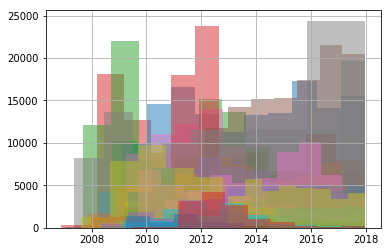

In [ ]:
raw = (
    raw #[(raw.timestamp > '2015-01-01') & (raw.timestamp < '2017-01-01')]\
    [raw.user.isin(keep_users)]
    .sample(frac=1) # shuffle dataset
    .reset_index(drop=True)
      )
    
raw.groupby("user")['timestamp'].hist(alpha = 0.5)

## Build vocabulary

In [ ]:
def build_vocabulary(text, min_count = 5):
    normalized = text.map(tokenizeString)
    all_words = np.array([item for sublist in normalized.values.tolist() for item in sublist])
    words, counts = np.unique(all_words, return_counts=True)
    keep_words = words[counts > min_count]
    ind2word = {i + 2 : w for i, w in enumerate(keep_words)}
    ind2word[1] = "UNK"
    ind2word[0] = "EMPTY"
    word2ind = {w : i for i, w in ind2word.items()}
    
    return word2ind, ind2word

word2ind, ind2word = build_vocabulary(raw.text)

## Preprocess text

In [ ]:
# Prepare sequences:
from keras.preprocessing.sequence import pad_sequences
vectorize_tweet = lambda x: [word2ind.get(w,1) for w in x]
PAD_LENGTH = 40
def encode_text(s, padlen = PAD_LENGTH):
    tokenized = tokenizeString(s)
    vectorized = vectorize_tweet(tokenized)
    padded = pad_sequences([vectorized], maxlen = padlen, padding = "post", truncating= "post")
    return padded

def decode_tweet(vec):
    dec = [ind2word.get(ind) for ind in vec if ind != 0]
    
    return " ".join(dec)

In [ ]:
X = np.squeeze(np.array(raw.text.map(encode_text).values.tolist()))#.shape

In [ ]:
X.shape

In [ ]:
decode_tweet(encode_text("nå er det barneskirenn").flatten())

In [ ]:
# Check length of tweets:
#raw.text_index.map(len).hist()

In [ ]:
from sklearn import preprocessing
def build_classes(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    label_index = le.transform(labels)
    ind2class = {i : user for i, user in  enumerate(le.classes_)}
    return label_index, ind2class

In [ ]:
raw['user_class'], ind2class = build_classes(raw['user'])

In [ ]:
N_classes = len(ind2class)
N_classes

In [ ]:
y = raw.user_class.values

In [ ]:
np.random.seed(42)
all_in_both_groups = False
while not all_in_both_groups:
    train_ind = np.random.rand(X.shape[0]) < 0.8
    X_train = X[train_ind,]
    X_test = X[~train_ind,]
    y_train = y[train_ind]
    y_test = y[~train_ind]
    all_in_both_groups = len(np.unique(y_train)) ==  len(np.unique(y_test)) == N_classes
    print("train: %d, test : %d" % (len(np.unique(y_train)), len(np.unique(y_test))))

In [ ]:
vocab = len(ind2word)
vocab

## Build model

In [ ]:
import keras
from keras.layers import *
from keras.models import Model

In [ ]:
tweet_input = Input((PAD_LENGTH,))
emb = Embedding(vocab, 20)

In [ ]:
word_vectors = emb(tweet_input)
word_vectors = Dropout(0.2)(word_vectors)

In [ ]:
avg_word_vectors = Lambda(lambda x: K.mean(x, 1))(word_vectors)
x = avg_word_vectors
x = Dropout(0.2)(x)
x = Dense(100)(x)
x = Dropout(0.2)(x)
x = Dense(100)(x)
x = Dropout(0.2)(x)
x = Dense(N_classes, activation = "softmax")(x)


model = Model(inputs = tweet_input, outputs = x)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Adam(lr = 0.005), 
              metrics=["accuracy"])

In [ ]:
"""
# LSTM MODEL
x = LSTM(10)(word_vectors)
x = Dense(3,activation = "softmax")(x)
model = Model(inputs = tweet_input, outputs = x)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Adam(lr = 0.001), 
              metrics=["accuracy"])
"""

In [ ]:
cl, count = np.unique(y_train, return_counts=True)
class_weight = {c : 1.0/np.sqrt(n) for c, n in zip(cl,count)}
tot = sum(class_weight.values())
class_weight = {i : w/tot for i, w in class_weight.items()}

In [ ]:
model.fit(X_train,y_train, 
          verbose = 2,
          validation_data = (X_test, y_test),
         epochs = 15, class_weight=class_weight)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Adam(lr = 0.0001), 
              metrics=["accuracy"])
model.fit(X_train,y_train, 
          verbose = 2,
          validation_data = (X_test, y_test),
         epochs = 15, class_weight=class_weight)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Adam(lr = 0.0001), 
              metrics=["accuracy"])
model.fit(X_train,y_train, 
          verbose = 2,
          validation_data = (X_test, y_test),
         epochs = 15, class_weight=class_weight)

In [ ]:
yhat_probs = model.predict(X_test)
yhat = yhat_probs.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_test,yhat)
#confusion

In [ ]:
rel_confusion = np.round(confusion / confusion.sum(axis=1, keepdims = True),2)
rel_confusion = pd.DataFrame(rel_confusion, columns = ind2class.values(), index= ind2class.values())
rel_confusion.index.name = "true"
rel_confusion.columns.name = "predicted"
rel_confusion

In [ ]:
import seaborn as sns
sns.heatmap(rel_confusion)

In [ ]:
def find_user(tweet, top = 3):
    v = encode_text(tweet)
    pred = model.predict(v)[0]
    top_ind = np.argsort(pred)[::-1][:top]
    return ", ".join(["%s : %.2f" % (ind2class[ind], pred[ind])  for ind in top_ind])

In [ ]:
find_user("de single har det for dårlig i Norge")

In [ ]:
find_user("det er viktig at noen passer på de som blir tatt av diplomatiet")

In [ ]:
find_user("Jul er tiden for familien")

In [ ]:
find_user("hva er meningen med livet?")

In [ ]:
find_user("julenissen er pågrepet på nordpolen")

In [ ]:
find_user("#sport er meningen med livet")

In [ ]:
find_user("lærere er meningen med livet")

In [ ]:
find_user("forsvar er meningen med livet")

In [ ]:
find_user("liberalisme må vike for sosialisme")

In [ ]:
find_user("arbeidere i alle land, foren dere")